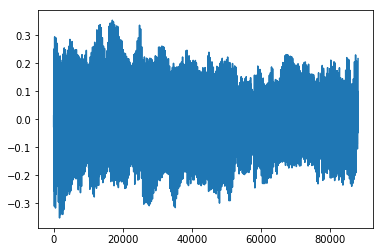

In [21]:
import scipy
import librosa
import numpy as np
import soundfile  as sf
import matplotlib.pyplot as plt
import IPython.display as ipd

def griffin_lim(stftm_matrix, shape, min_iter=20, max_iter=50, delta=20):
    y = np.random.random(shape)
    y_iter = []

    for i in range(max_iter):
        if i >= min_iter and (i - min_iter) % delta == 0:
            y_iter.append((y, i))
        stft_matrix = librosa.core.stft(y)
        stft_matrix = stftm_matrix * stft_matrix / np.abs(stft_matrix)
        y = librosa.core.istft(stft_matrix)
    return y


x,fs = sf.read('my_a.wav')
abs_x = np.abs(librosa.core.stft(x))
y = griffin_lim(abs_x, x.shape)
plt.plot(y)
plt.show()
ipd.Audio(y, rate=fs)